In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nalger_helper_functions import plot_rectangle, grid_interpolate, make_regular_grid, conforming_box

<ipython-input-2-3ff26f3f7a3d>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XA, YA, A)
<ipython-input-2-3ff26f3f7a3d>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XB, YB, B)
<ipython-input-2-3ff26f3f7a3d>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gourau

Text(0.5, 1.0, 'C')

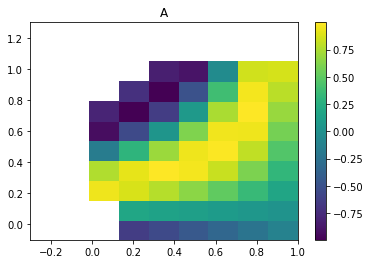

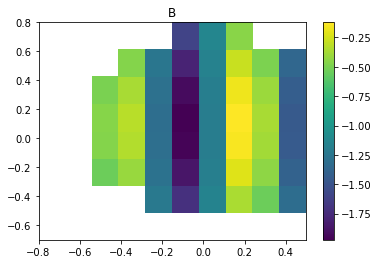

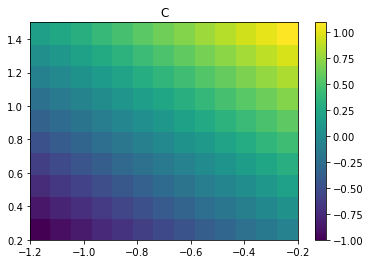

In [2]:
A_min = np.array([-0.3, -0.1])
A_max = np.array([1.0, 1.3])
A_shape = (10,12)
_, (XA, YA) = make_regular_grid(A_min, A_max, A_shape)
good_points_A = ((XA - 0.5)**2 + (YA - 0.4)**2) < 0.4
bad_points_A = np.logical_not(good_points_A)
A = np.zeros(A_shape)
A[good_points_A] = np.sin(2 * (1. - XA) * 4 * YA)[good_points_A]
A[bad_points_A] = np.nan

plt.figure()
plt.pcolor(XA, YA, A)
plt.colorbar()
plt.title('A')

B_min = np.array([-0.8, -0.7])
B_max = np.array([0.5, 0.8])
B_shape = (11,9)
_, (XB, YB) = make_regular_grid(B_min, B_max, B_shape)
good_points_B = ((XB - 0.0)**2 + (YB - 0.0)**2) < 0.4
bad_points_B = np.logical_not(good_points_B)
B = np.zeros(B_shape)
B[good_points_B] = (-1. +  (1. - XB**2 - YB**2) * np.sin(10.*XB))[good_points_B]
B[bad_points_B] = np.nan

plt.figure()
plt.pcolor(XB, YB, B)
plt.colorbar()
plt.title('B')


C_min = np.array([-1.2, 0.2])
C_max = np.array([-0.2, 1.5])
C_shape = (14,11)
_, (XC, YC) = make_regular_grid(C_min, C_max, C_shape)
good_points_C = np.ones(C_shape, dtype=bool)
bad_points_C = np.logical_not(good_points_C)
C = np.zeros(C_shape)
C[good_points_C] = (XC + YC)[good_points_C]
C[bad_points_C] = np.nan

plt.figure()
plt.pcolor(XC, YC, C)
plt.colorbar()
plt.title('C')

grid_hh= [0.14444444 0.12727273]


(-1.0, 2.0)

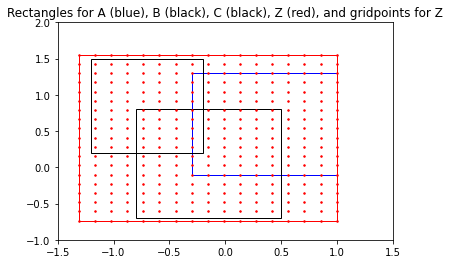

In [3]:
anchor_point = A_min

grid_hh = (A_max - A_min) / (np.array(A_shape) - 1.)
print('grid_hh=', grid_hh)

Z_min0 = np.min([A_min, B_min, C_min], axis=0)
Z_max0 = np.max([A_max, B_max, C_max], axis=0)

Z_min, Z_max, Z_shape = conforming_box(Z_min0, Z_max0, anchor_point, grid_hh)
_, (XZ, YZ) = make_regular_grid(Z_min, Z_max, Z_shape)

plt.figure()
plot_rectangle(A_min, A_max, edgecolor='b')
plot_rectangle(B_min, B_max)
plot_rectangle(C_min, C_max)
plot_rectangle(Z_min, Z_max, edgecolor='r')
plt.plot(XZ.reshape(-1), YZ.reshape(-1), '.r', markersize=3)
plt.title('Rectangles for A (blue), B (black), C (black), Z (red), and gridpoints for Z')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.0, 2.0)

<ipython-input-4-b5bdde79d28f>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XZ, YZ, A_zgrid)
<ipython-input-4-b5bdde79d28f>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XZ, YZ, B_zgrid)
<ipython-input-4-b5bdde79d28f>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest'

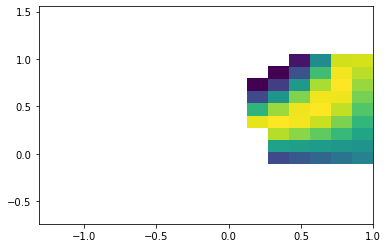

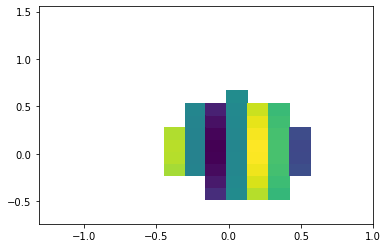

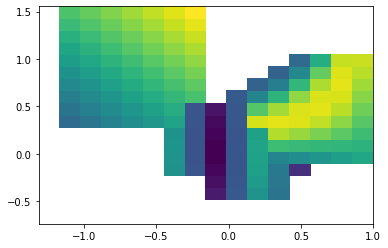

In [4]:
Z_points = np.vstack([XZ.reshape(-1), YZ.reshape(-1)]).T

A_zgrid = grid_interpolate(A_min, A_max, A, Z_points, fill_value=np.nan).reshape(Z_shape)
B_zgrid = grid_interpolate(B_min, B_max, B, Z_points, fill_value=np.nan).reshape(Z_shape)
C_zgrid = grid_interpolate(C_min, C_max, C, Z_points, fill_value=np.nan).reshape(Z_shape)

plt.figure()
plt.pcolor(XZ, YZ, A_zgrid)

plt.figure()
plt.pcolor(XZ, YZ, B_zgrid)

Z = np.nan * np.ones(Z_shape)

good_C_zgrid = np.logical_not(np.isnan(C_zgrid))
Z[good_C_zgrid] = C_zgrid[good_C_zgrid]

good_B_zgrid = np.logical_not(np.isnan(B_zgrid))
Z[good_B_zgrid] = B_zgrid[good_B_zgrid]

good_A_zgrid = np.logical_not(np.isnan(A_zgrid))
Z[good_A_zgrid] = A_zgrid[good_A_zgrid]

plt.figure()
plt.pcolor(XZ, YZ, Z)